In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/ train_users_2.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking']) 
data_test = pd.read_csv('/content/drive/MyDrive/test_users.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
data_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
data_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaT,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [ ]:
data_train.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


In [ ]:
rows_train = data_train.shape[0]

In [ ]:
countries = pd.read_csv('/content/drive/MyDrive/ countries.csv')
countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [ ]:
session = pd.read_csv('/content/drive/MyDrive/sessions.csv')
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


**Merging train and test data**

In [ ]:
test_ids = data_test['id']
labels = data_train['country_destination'].values
data_train1 = data_train.drop(['country_destination'], axis=1)
data_all = pd.concat((data_train1, data_test), axis = 0, ignore_index = True)
data_all = data_all.drop(['id','date_first_booking'], axis=1)
data_all.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [ ]:
print(data_all.isnull().sum())

date_account_created            0
timestamp_first_active          0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
dtype: int64


**Data Cleaning**

In [ ]:
data_all.gender.replace('-unknown-', np.nan, inplace=True)

In [ ]:
data_all.loc[data_all.age > 100, 'age'] = np.nan
data_all.loc[data_all.age < 15, 'age'] = np.nan
data_all['age'].fillna(value=data_all['age'].mean(), inplace=True)
data_all.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,2009-03-19 04:32:55,NaN,36.055043,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,2009-05-23 17:48:09,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,2009-12-08 06:11:05,NaN,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [ ]:
data_all['da_year'] = data_all.date_account_created.dt.year
data_all['da_month'] = data_all.date_account_created.dt.month
data_all['da_day'] = data_all.date_account_created.dt.day

data_all['tsfa_year'] = data_all.timestamp_first_active.dt.year
data_all['tsfa_month'] = data_all.timestamp_first_active.dt.month
data_all['tsfa_day'] = data_all.timestamp_first_active.dt.day

data_all.drop('date_account_created',1, inplace=True)
data_all.drop('timestamp_first_active',1, inplace=True)

<ipython-input-28-12ee75263737>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_all.drop('date_account_created',1, inplace=True)
<ipython-input-28-12ee75263737>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_all.drop('timestamp_first_active',1, inplace=True)


In [ ]:
data_all.drop(['signup_method','signup_flow','first_affiliate_tracked','signup_app','first_device_type','first_browser'],1, inplace=True)

<ipython-input-29-819af3ac3a2e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_all.drop(['signup_method','signup_flow','first_affiliate_tracked','signup_app','first_device_type','first_browser'],1, inplace=True)


In [ ]:
data_all.head()

,gender,age,language,affiliate_channel,affiliate_provider,da_year,da_month,da_day,tsfa_year,tsfa_month,tsfa_day
0,NaN,36.055043,en,direct,direct,2010,6,28,2009,3,19
1,MALE,38.000000,en,seo,google,2011,5,25,2009,5,23
2,FEMALE,56.000000,en,direct,direct,2010,9,28,2009,6,9
3,FEMALE,42.000000,en,direct,direct,2011,12,5,2009,10,31
4,NaN,41.000000,en,direct,direct,2010,9,14,2009,12,8


In [ ]:
data_all.describe()

,age,da_year,da_month,da_day,tsfa_year,tsfa_month,tsfa_day
count,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000
mean,36.055043,2013.243828,6.457505,15.958969,2013.243341,6.457446,15.958845
std,8.774132,0.921206,2.985339,8.757489,0.921756,2.985189,8.757084
min,15.000000,2010.000000,1.000000,1.000000,2009.000000,1.000000,1.000000
25%,32.000000,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000
50%,36.055043,2014.000000,7.000000,16.000000,2014.000000,7.000000,16.000000
75%,36.055043,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000
max,100.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000


In [ ]:
data_all.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
FEMALE,15.0,100.0,35.751334,77524
MALE,15.0,100.0,36.263575,68209
OTHER,17.0,78.0,35.907762,334


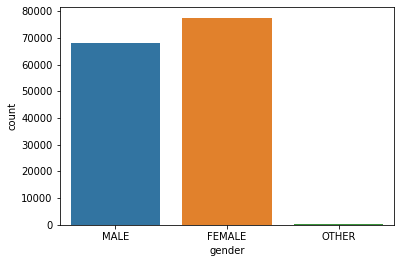

In [ ]:
#data_all.gender.value_counts(dropna=False).plot(kind='bar')
plt.figure()
ax = sns.countplot(x='gender', data=data_all)

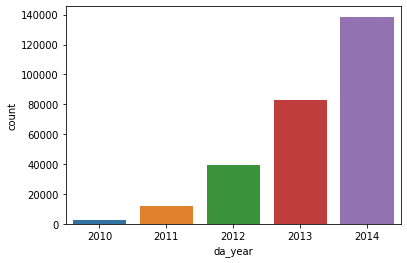

In [ ]:
#data_all.da_year.value_counts(sort=False).plot(kind='bar', title='Number of User Accounts Created in a Year')
plt.figure()
ax = sns.countplot(x='da_year', data=data_all)

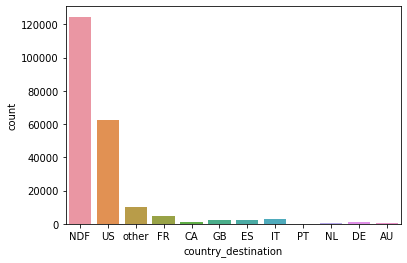

In [ ]:
#data_train.country_destination.value_counts(normalize=True).plot(kind='bar',title='Countries Visited by AirBNB Users')
plt.figure()
ax = sns.countplot(x='country_destination', data=data_train)

In [ ]:
data_all.language.value_counts(sort=True) 

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
pl               75
da               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

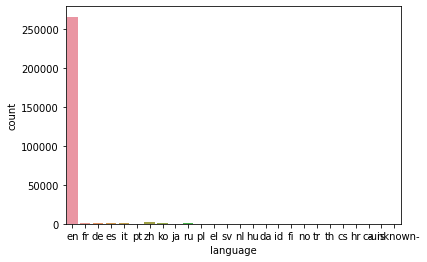

In [ ]:
#data_all.language.value_counts(dropna=False).plot(kind='bar')
plt.figure()
ax = sns.countplot(x='language', data=data_all)

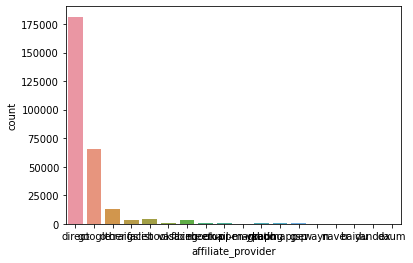

In [ ]:
#data_all.affiliate_provider.value_counts(dropna=False).plot(kind='bar')
plt.figure()
ax = sns.countplot(x='affiliate_provider', data=data_all)

In [ ]:
print(data_all.isnull().sum())

gender                129480
age                        0
language                   0
affiliate_channel          0
affiliate_provider         0
da_year                    0
da_month                   0
da_day                     0
tsfa_year                  0
tsfa_month                 0
tsfa_day                   0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
labler = LabelEncoder()
features = ['gender','language','affiliate_channel','affiliate_provider']
data_all[features] = labler.fit_transform(features)

In [ ]:
data_all.describe()

,gender,age,language,affiliate_channel,affiliate_provider,da_year,da_month,da_day,tsfa_year,tsfa_month,tsfa_day
count,275547.0,275547.000000,275547.0,275547.0,275547.0,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000
mean,2.0,36.055043,3.0,0.0,1.0,2013.243828,6.457505,15.958969,2013.243341,6.457446,15.958845
std,0.0,8.774132,0.0,0.0,0.0,0.921206,2.985339,8.757489,0.921756,2.985189,8.757084
min,2.0,15.000000,3.0,0.0,1.0,2010.000000,1.000000,1.000000,2009.000000,1.000000,1.000000
25%,2.0,32.000000,3.0,0.0,1.0,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000
50%,2.0,36.055043,3.0,0.0,1.0,2014.000000,7.000000,16.000000,2014.000000,7.000000,16.000000
75%,2.0,36.055043,3.0,0.0,1.0,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000
max,2.0,100.000000,3.0,0.0,1.0,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000


In [ ]:
data_all.head()

,gender,age,language,affiliate_channel,affiliate_provider,da_year,da_month,da_day,tsfa_year,tsfa_month,tsfa_day
0,2,36.055043,3,0,1,2010,6,28,2009,3,19
1,2,38.000000,3,0,1,2011,5,25,2009,5,23
2,2,56.000000,3,0,1,2010,9,28,2009,6,9
3,2,42.000000,3,0,1,2011,12,5,2009,10,31
4,2,41.000000,3,0,1,2010,9,14,2009,12,8


In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

V = data_all.values
X_train = V[:rows_train]
X_test = V[rows_train:]

y = labler.fit_transform(labels)
xgb = XGBClassifier(max_depth=6,learning_rate=0.3,n_estimators=25,objective='multi:softprob')
xgb.fit(X_train, y)
y_pred = xgb.predict_proba(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y)
y_predi= classifier.predict(X_test)

In [ ]:
ids = []  #list of ids
cts = []  #list of countries
cts1 = []
for i in range(len(test_ids)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += labler.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('submission.csv',index=False)
sub

,id,country
0,5uwns89zht,US
1,5uwns89zht,NDF
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,IT
...,...,...
310475,9uqfg8txu3,NDF
310476,9uqfg8txu3,US
310477,9uqfg8txu3,other
310478,9uqfg8txu3,FR


In [ ]:
from google.colab import drive
drive.mount('/content/drive')